# Proyecto Final
## Predicción de Fraude en tarjetas de crédito
### Majo Gil - 20337
### Joshua Chicoj -20566

In [190]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

## Preprocesamiento de datos

In [191]:
data = pd.read_csv("application_data.csv")
data.shape

(307511, 122)

In [192]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [193]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [194]:
data.nunique()

SK_ID_CURR                    307511
TARGET                             2
NAME_CONTRACT_TYPE                 2
CODE_GENDER                        3
FLAG_OWN_CAR                       2
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY          9
AMT_REQ_CREDIT_BUREAU_WEEK         9
AMT_REQ_CREDIT_BUREAU_MON         24
AMT_REQ_CREDIT_BUREAU_QRT         11
AMT_REQ_CREDIT_BUREAU_YEAR        25
Length: 122, dtype: int64

In [195]:
data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

### Variables Cualitativas
* SK_ID_CURR: ID of loan in our sample
* TARGET: Target variable (1 - client with payment difficulties, 0 - all other cases)
* NAME_CONTRACT_TYPE: Identification if loan is cash or revolving
* CODE_GENDER: Gender of the client
* FLAG_OWN_CAR: Flag if the client owns a car
* FLAG_OWN_REALTY: Flag if client owns a house or flat
* NAME_TYPE_SUITE: Who was accompanying client when he was applying for the loan
* NAME_INCOME_TYPE: Clients income type (businessman, working, maternity leave,…)
* NAME_EDUCATION_TYP: Level of highest education the client achieved
* NAME_FAMILY_STATUS: Family status of the client
* NAME_HOUSING_TYPE: What is the housing situation of the client (renting, living with parents, ...)
* FLAG_MOBIL: Did client provide mobile phone (1=YES, 0=NO)
* FLAG_EMP_PHONE: Did client provide work phone (1=YES, 0=NO)
* FLAG_WORK_PHONE: Did client provide home phone (1=YES, 0=NO)
* FLAG_CONT_MOBILE: Was mobile phone reachable (1=YES, 0=NO)
* FLAG_PHONE: Did client provide home phone (1=YES, 0=NO)
* FLAG_EMAIL: Did client provide email (1=YES, 0=NO)
* OCCUPATION_TYPE: What kind of occupation does the client have
* REGION_RATING_CLIENT: Our rating of the region where client lives (1,2,3)
* REGION_RATING_CLIENT_W_CITY: Our rating of the region where client lives with taking city into account (1,2,3)
* WEEKDAY_APPR_PROCESS_START: On which day of the week did the client apply for the loan
* HOUR_APPR_PROCESS_START: Approximately at what hour did the client apply for the loan
* REG_REGION_NOT_LIVE_REGION: Flag if client's permanent address does not match contact address (1=different, 0=same, at region level)
* REG_REGION_NOT_WORK_REGION: Flag if client's permanent address does not match work address (1=different, 0=same, at region level)
* LIVE_REGION_NOT_WORK_REGION: Flag if client's contact address does not match work address (1=different, 0=same, at region level)
* REG_CITY_NOT_LIVE_CITY: Flag if client's permanent address does not match contact address (1=different, 0=same, at city level)
* REG_CITY_NOT_WORK_CITY: Flag if client's permanent address does not match work address (1=different, 0=same, at city level)
* LIVE_CITY_NOT_WORK_CITY: Flag if client's contact address does not match work address (1=different, 0=same, at city level)
* ORGANIZATION_TYPE: Type of organization where client works
* FLAG_DOCUMENT_2	Did client provide document 2
* FLAG_DOCUMENT_3	Did client provide document 3
* FLAG_DOCUMENT_4	Did client provide document 4
* FLAG_DOCUMENT_5	Did client provide document 5
* FLAG_DOCUMENT_6	Did client provide document 6
* FLAG_DOCUMENT_7	Did client provide document 7
* FLAG_DOCUMENT_8	Did client provide document 8
* FLAG_DOCUMENT_9	Did client provide document 9
* FLAG_DOCUMENT_10	Did client provide document 10
* FLAG_DOCUMENT_11	Did client provide document 11
* FLAG_DOCUMENT_12	Did client provide document 12
* FLAG_DOCUMENT_13	Did client provide document 13
* FLAG_DOCUMENT_14	Did client provide document 14
* FLAG_DOCUMENT_15	Did client provide document 15
* FLAG_DOCUMENT_16	Did client provide document 16
* FLAG_DOCUMENT_17	Did client provide document 17
* FLAG_DOCUMENT_18	Did client provide document 18
* FLAG_DOCUMENT_19	Did client provide document 19
* FLAG_DOCUMENT_20	Did client provide document 20
* FLAG_DOCUMENT_21	Did client provide document 21
* OBS_30_CNT_SOCIAL_CIRCLE	How many observation of client's social surroundings with observable 30 DPD (days past due) default
* DEF_30_CNT_SOCIAL_CIRCLE	How many observation of client's social surroundings defaulted on 30 DPD (days past due) 
* OBS_60_CNT_SOCIAL_CIRCLE	How many observation of client's social surroundings with observable 60 DPD (days past due) default
* DEF_60_CNT_SOCIAL_CIRCLE	How many observation of client's social surroundings defaulted on 60 (days past due) DPD

### Variables Cuantitativas
* CNT_CHILDREN: Number of children the client has
* AMT_INCOME_TOTAL: Income of the client
* AMT_CREDIT: Credit amount of the loan
* AMT_ANNUITY: Loan annuity
* AMT_GOODS_PRICE: For consumer loans it is the price of the goods for which the loan is given
* REGION_POPULATION_RELATIVE: Normalized population of region where client lives (higher number means the client lives in more populated region)
* DAYS_BIRTH: Client's age in days at the time of application
* DAYS_EMPLOYED: How many days before the application the person started current employment
* DAYS_REGISTRATION: How many days before the application did client change his registration
* DAYS_ID_PUBLISH: How many days before the application did client change the identity document with which he applied for the loan
* OWN_CAR_AGE: Age of client's car
* CNT_FAM_MEMBERS: How many family members does client have
* EXT_SOURCE_1: Normalized score from external data source
* EXT_SOURCE_2: Normalized score from external data source
* EXT_SOURCE_3:	Normalized score from external data source
* APARTMENTS_AVG: Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* BASEMENTAREA_AVG: Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* YEARS_BEGINEXPLUATATION_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
YEARS_BUILD_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* COMMONAREA_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* ELEVATORS_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* ENTRANCES_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* FLOORSMAX_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* FLOORSMIN_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* LANDAREA_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* LIVINGAPARTMENTS_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* LIVINGAREA_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* NONLIVINGAPARTMENTS_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* NONLIVINGAREA_AVG	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* APARTMENTS_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* BASEMENTAREA_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* YEARS_BEGINEXPLUATATION_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* YEARS_BUILD_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* COMMONAREA_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* ELEVATORS_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* ENTRANCES_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* FLOORSMAX_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* FLOORSMIN_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* LANDAREA_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* LIVINGAPARTMENTS_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* LIVINGAREA_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* NONLIVINGAPARTMENTS_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* NONLIVINGAREA_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* APARTMENTS_MEDI	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* BASEMENTAREA_MEDI	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* YEARS_BEGINEXPLUATATION_MEDI	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* YEARS_BUILD_MEDI	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* COMMONAREA_MEDI	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* ELEVATORS_MEDI	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* ENTRANCES_MEDI	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* FLOORSMAX_MEDI	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* FLOORSMIN_MEDI	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* LANDAREA_MEDI	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* LIVINGAPARTMENTS_MEDI	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* LIVINGAREA_MEDI	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* NONLIVINGAPARTMENTS_MEDI	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* NONLIVINGAREA_MEDI	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* FONDKAPREMONT_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* HOUSETYPE_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* TOTALAREA_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* WALLSMATERIAL_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* EMERGENCYSTATE_MODE	Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
* DAYS_LAST_PHONE_CHANGE	How many days before application did client change phone
* AMT_REQ_CREDIT_BUREAU_HOUR	Number of enquiries to Credit Bureau about the client one hour before application
* AMT_REQ_CREDIT_BUREAU_DAY	Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application)
* AMT_REQ_CREDIT_BUREAU_WEEK	Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application)
* AMT_REQ_CREDIT_BUREAU_MON	Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application)
* AMT_REQ_CREDIT_BUREAU_QRT	Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application)
* AMT_REQ_CREDIT_BUREAU_YEAR	Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application)


## Reducción de datos

### Variables a eliminar

In [196]:
data.drop(['SK_ID_CURR', 'NAME_TYPE_SUITE', 'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LIVINGAPARTMENTS_AVG',  'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',  'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE','FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'EMERGENCYSTATE_MODE', 'DAYS_LAST_PHONE_CHANGE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'CODE_GENDER', 'REGION_RATING_CLIENT_W_CITY', 'LANDAREA_AVG','LIVINGAREA_AVG' ], axis=1, inplace=True)
# 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 

### Variables a modificar

In [197]:
data['AMT_REQ_CREDIT_BUREAU'] = data[['AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_YEAR']].sum(axis=1)
data.drop(['AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_YEAR'], axis=1, inplace=True)

In [198]:
data['INFO_FLAG'] = data[['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_EMAIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE']].sum(axis = 1)
data.drop(['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_EMAIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE'], axis=1, inplace=True)

In [199]:
data['FALSE_INFO'] = data[['REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY']].sum(axis=1)
data.drop(['REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY'], axis=1, inplace=True)

In [200]:
data['DAYS_BIRTH'] = data['DAYS_BIRTH'].abs()
data['DAYS_EMPLOYED'] = data['DAYS_EMPLOYED'].abs()
data['DAYS_REGISTRATION'] = data['DAYS_REGISTRATION'].abs()

data['DAYS_REGISTRATION'] = data['DAYS_REGISTRATION'].fillna(data['DAYS_REGISTRATION'].mean())
data = data.dropna()
data.head(15)

,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,TOTALAREA_MODE,WALLSMATERIAL_MODE,AMT_REQ_CREDIT_BUREAU,INFO_FLAG,FALSE_INFO
0,1,Cash loans,N,Y,0,202500.0,406597.5,24700.5,Working,Secondary / secondary special,...,WEDNESDAY,10,0.083037,0.262949,0.139376,0.0149,"Stone, brick",1.0,4,0
25,0,Cash loans,N,Y,0,90000.0,225000.0,11074.5,Working,Secondary / secondary special,...,SATURDAY,8,0.561948,0.651406,0.461482,0.0533,"Stone, brick",0.0,4,0
50,0,Revolving loans,N,Y,0,54000.0,135000.0,6750.0,State servant,Higher education,...,THURSDAY,9,0.656225,0.450850,0.479449,0.0403,Panel,0.0,2,0
51,0,Cash loans,Y,Y,1,540000.0,675000.0,34596.0,Commercial associate,Higher education,...,TUESDAY,10,0.311510,0.713355,0.309275,0.5149,Panel,4.0,4,0
55,0,Cash loans,N,Y,0,180000.0,837427.5,45558.0,Working,Higher education,...,MONDAY,15,0.552772,0.616637,0.070109,0.0857,"Stone, brick",5.0,5,0
57,0,Revolving loans,N,Y,0,81000.0,247500.0,12375.0,Working,Secondary / secondary special,...,WEDNESDAY,14,0.237720,0.609135,0.513694,0.0926,Panel,0.0,5,2
65,0,Cash loans,N,Y,0,180000.0,1256400.0,40657.5,Commercial associate,Secondary / secondary special,...,WEDNESDAY,12,0.286783,0.647348,0.562060,0.1114,Panel,8.0,3,0
68,0,Revolving loans,N,N,1,157500.0,450000.0,22500.0,Commercial associate,Secondary / secondary special,...,SUNDAY,10,0.411506,0.123888,0.832785,0.1925,Panel,5.0,3,0
70,0,Cash loans,N,N,2,180000.0,450000.0,21109.5,Commercial associate,Higher education,...,MONDAY,12,0.357707,0.686505,0.394495,0.0444,Panel,3.0,5,0
71,0,Cash loans,Y,Y,0,103500.0,573628.5,24435.0,Working,Secondary / secondary special,...,MONDAY,18,0.270766,0.707126,0.597192,0.1324,"Stone, brick",3.0,3,0


In [201]:
data['EXT_SOURCE_1'].mean()

0.5047124728624073

In [202]:
data['EXT_SOURCE_2'].mean()

0.5488704826968084

In [203]:
data['EXT_SOURCE_3'].mean()

0.4948040074311587

### Descripción de datos

In [204]:
data.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,TOTALAREA_MODE,AMT_REQ_CREDIT_BUREAU,INFO_FLAG,FALSE_INFO
count,42499.000000,42499.000000,4.249900e+04,4.249900e+04,42499.000000,42499.000000,42499.000000,42499.000000,42499.000000,42499.000000,42499.000000,42499.000000,42499.000000,42499.000000,42499.000000,42499.000000,42499.000000,42499.000000
mean,0.066990,0.544789,1.953484e+05,6.464112e+05,29135.280018,14274.697193,2364.428645,4520.956823,2.284054,2.006730,12.395986,0.504712,0.548870,0.494804,0.105241,2.468952,3.647898,0.419257
std,0.250007,0.763131,5.778632e+05,4.328809e+05,15432.546204,3358.062101,2255.579123,3198.385836,0.947923,0.539251,3.341508,0.205382,0.175166,0.194161,0.108950,2.227157,0.784532,0.985514
min,0.000000,0.000000,2.700000e+04,4.500000e+04,2317.500000,7680.000000,4.000000,0.000000,1.000000,1.000000,0.000000,0.014691,0.000010,0.000527,0.000000,0.000000,2.000000,0.000000
25%,0.000000,0.000000,1.260000e+05,2.888730e+05,17905.500000,11611.000000,779.000000,1641.500000,2.000000,2.000000,10.000000,0.343936,0.457474,0.352340,0.043500,1.000000,3.000000,0.000000
50%,0.000000,0.000000,1.665000e+05,5.400000e+05,26640.000000,13984.000000,1666.000000,4255.000000,2.000000,2.000000,12.000000,0.508671,0.595001,0.513694,0.070000,2.000000,3.000000,0.000000
75%,0.000000,1.000000,2.250000e+05,9.000000e+05,37194.750000,16580.000000,3186.500000,6866.000000,3.000000,2.000000,15.000000,0.670946,0.680521,0.651260,0.130600,4.000000,4.000000,0.000000
max,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,25017.000000,16495.000000,17565.000000,20.000000,3.000000,23.000000,0.941986,0.855000,0.887664,1.000000,24.000000,6.000000,6.000000


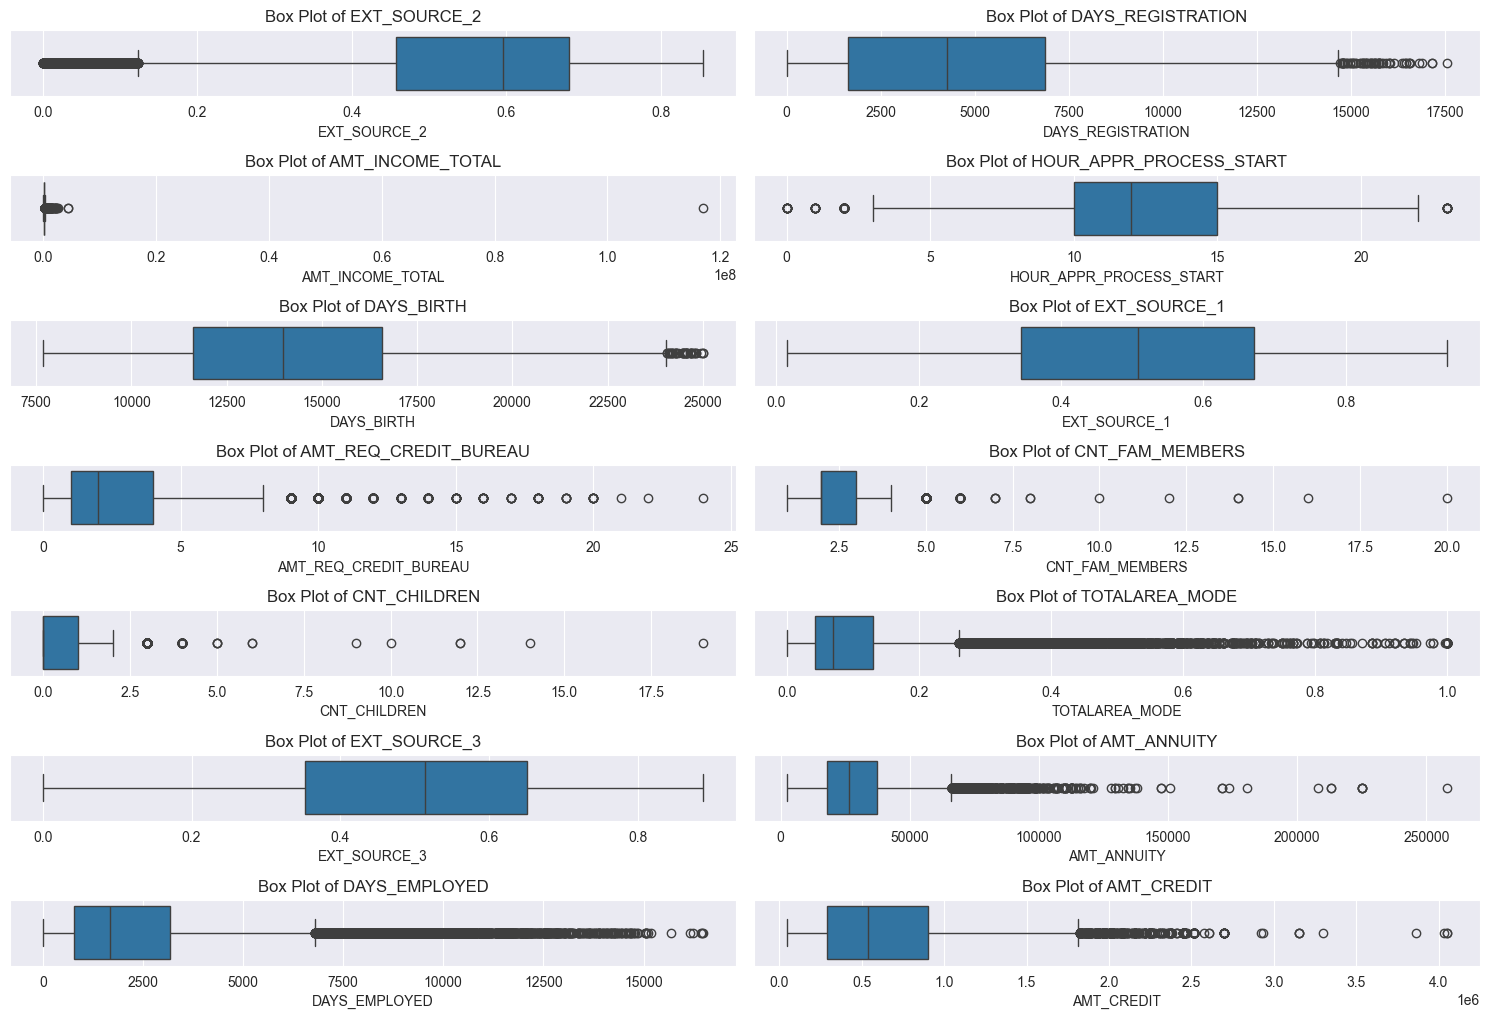

In [205]:
categorical_cols = ['TARGET', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 
       'OCCUPATION_TYPE', 'REGION_RATING_CLIENT', 'WEEKDAY_APPR_PROCESS_START', 'INFO_FLAG', 'FALSE_INFO','WALLSMATERIAL_MODE']
numerical_cols = list(set(data.columns) - set(categorical_cols))

# Plot box plots for each numerical variable
plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 2, i)
    sns.boxplot(x=data[col])
    plt.title(f'Box Plot of {col}')
    plt.tight_layout()

plt.show()

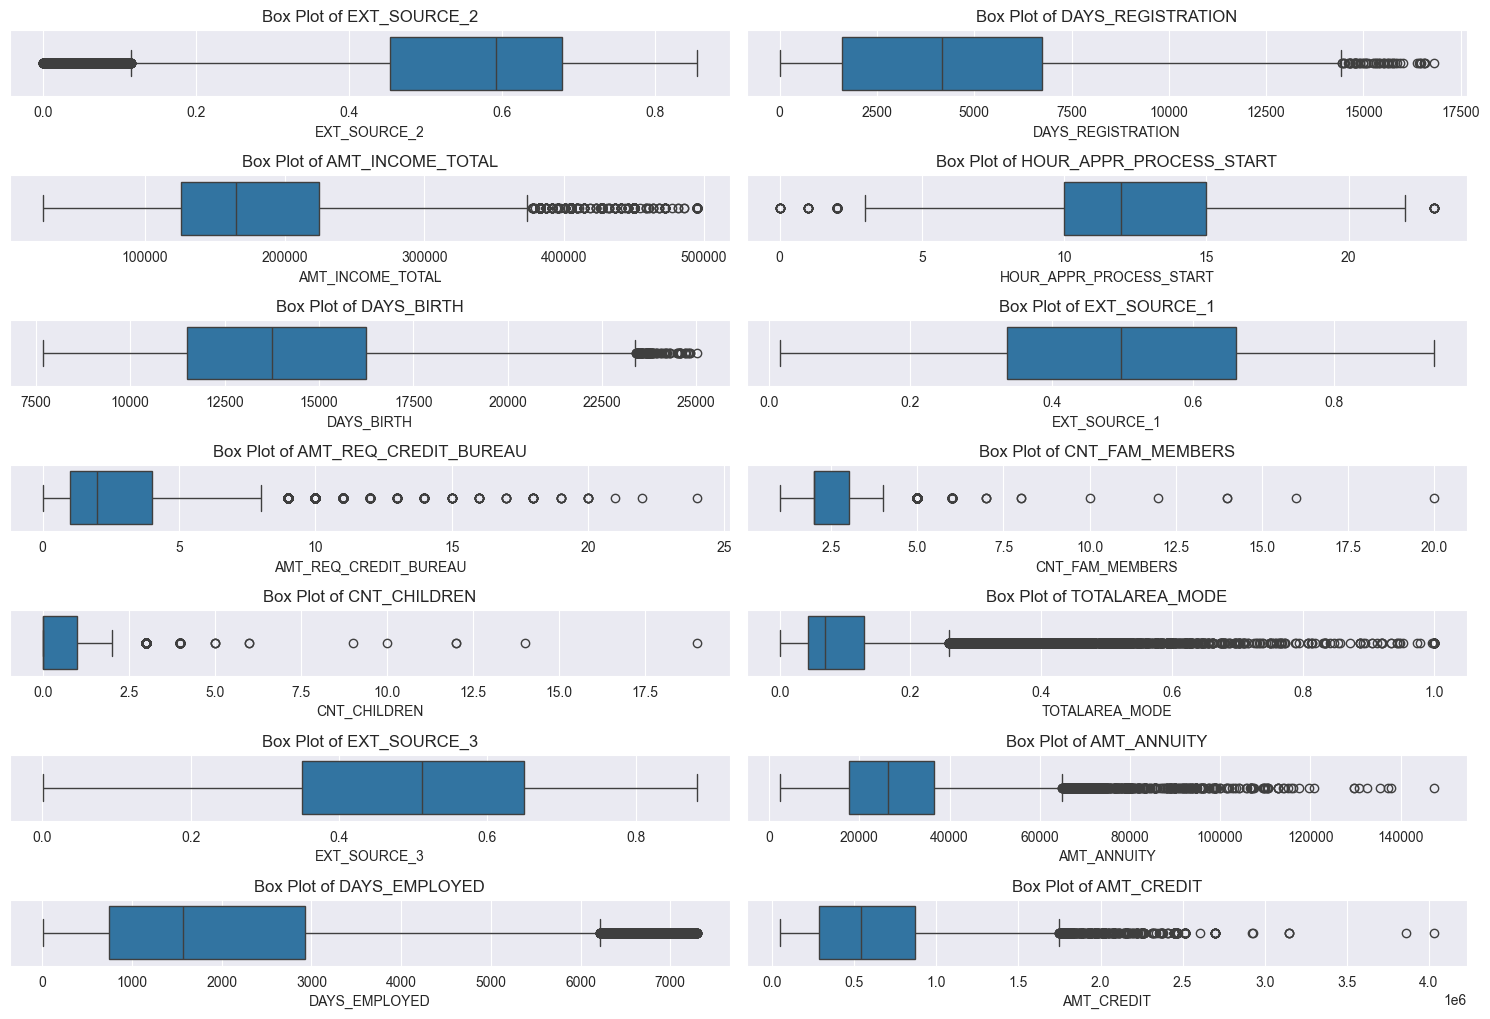

In [206]:
data = data.loc[data['DAYS_EMPLOYED'] < 7300]
data = data.loc[data['DAYS_REGISTRATION'] < 17000]
data = data.loc[data['AMT_INCOME_TOTAL'] < 500000]
data = data.loc[data['AMT_ANNUITY'] < 150000]

plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 2, i)
    sns.boxplot(x=data[col])
    plt.title(f'Box Plot of {col}')
    plt.tight_layout()

plt.show()

In [207]:
data['TARGET'].value_counts()

TARGET
0    37198
1     2744
Name: count, dtype: int64

In [208]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

In [209]:
for col, encoder in label_encoders.items():
    print(f"Column: {col}")
    for i, class_label in enumerate(encoder.classes_):
        print(f"  {i} -> {class_label}")

Column: TARGET
  0 -> 0
  1 -> 1
Column: NAME_CONTRACT_TYPE
  0 -> Cash loans
  1 -> Revolving loans
Column: FLAG_OWN_CAR
  0 -> N
  1 -> Y
Column: FLAG_OWN_REALTY
  0 -> N
  1 -> Y
Column: NAME_INCOME_TYPE
  0 -> Businessman
  1 -> Commercial associate
  2 -> State servant
  3 -> Student
  4 -> Working
Column: NAME_EDUCATION_TYPE
  0 -> Academic degree
  1 -> Higher education
  2 -> Incomplete higher
  3 -> Lower secondary
  4 -> Secondary / secondary special
Column: NAME_FAMILY_STATUS
  0 -> Civil marriage
  1 -> Married
  2 -> Separated
  3 -> Single / not married
  4 -> Widow
Column: NAME_HOUSING_TYPE
  0 -> Co-op apartment
  1 -> House / apartment
  2 -> Municipal apartment
  3 -> Office apartment
  4 -> Rented apartment
  5 -> With parents
Column: OCCUPATION_TYPE
  0 -> Accountants
  1 -> Cleaning staff
  2 -> Cooking staff
  3 -> Core staff
  4 -> Drivers
  5 -> HR staff
  6 -> High skill tech staff
  7 -> IT staff
  8 -> Laborers
  9 -> Low-skill Laborers
  10 -> Managers
  11 

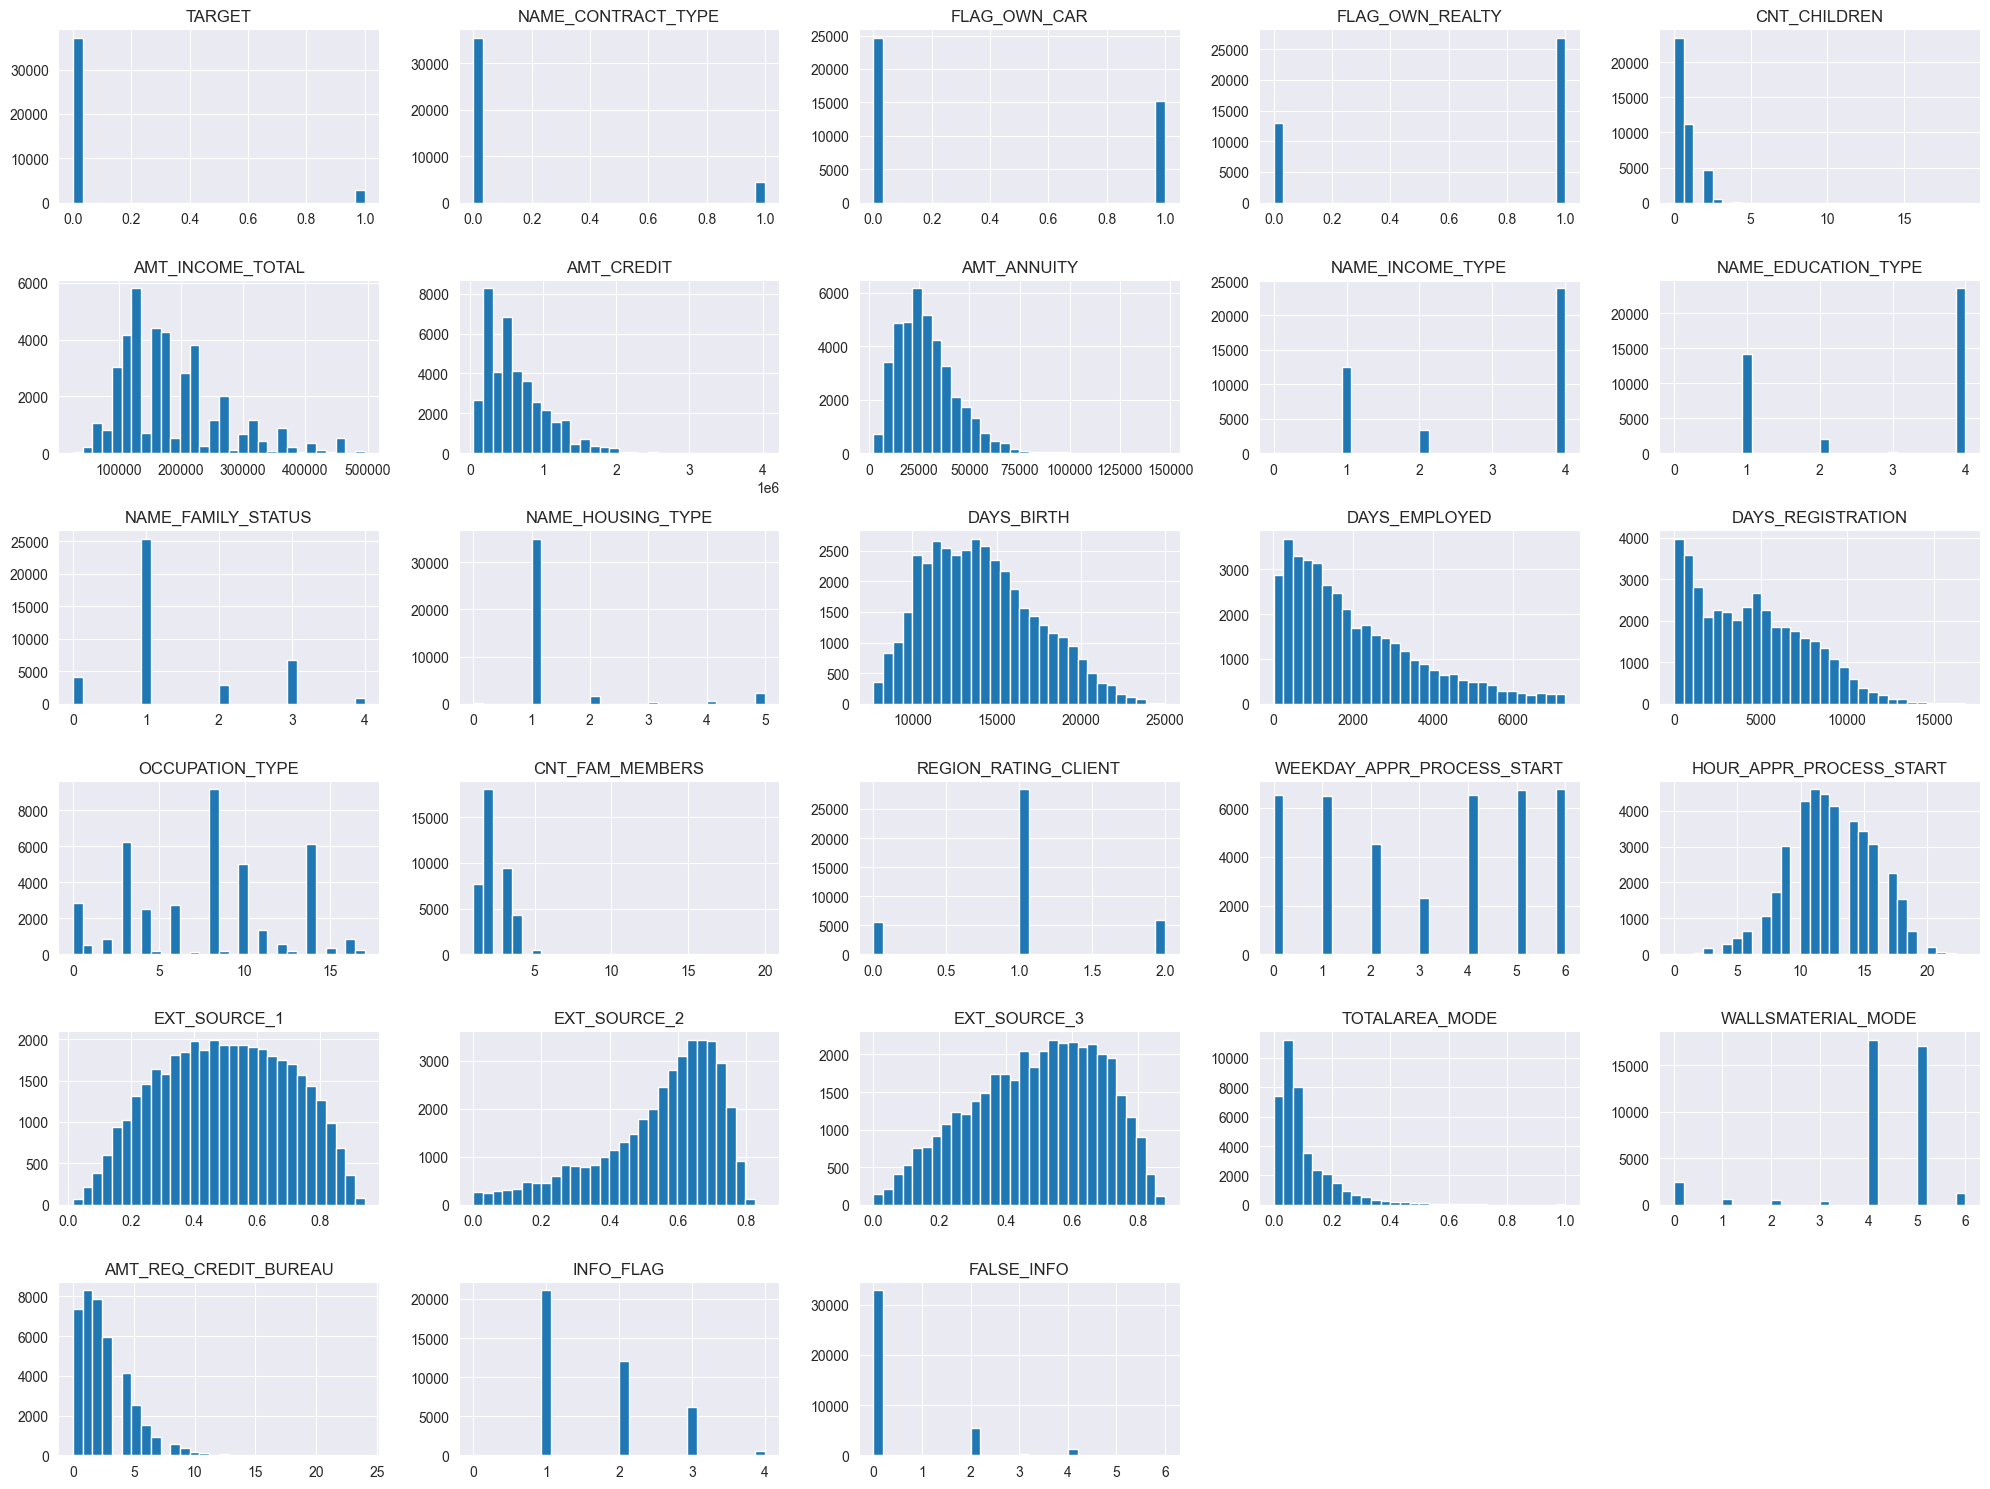

In [210]:
data.hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()

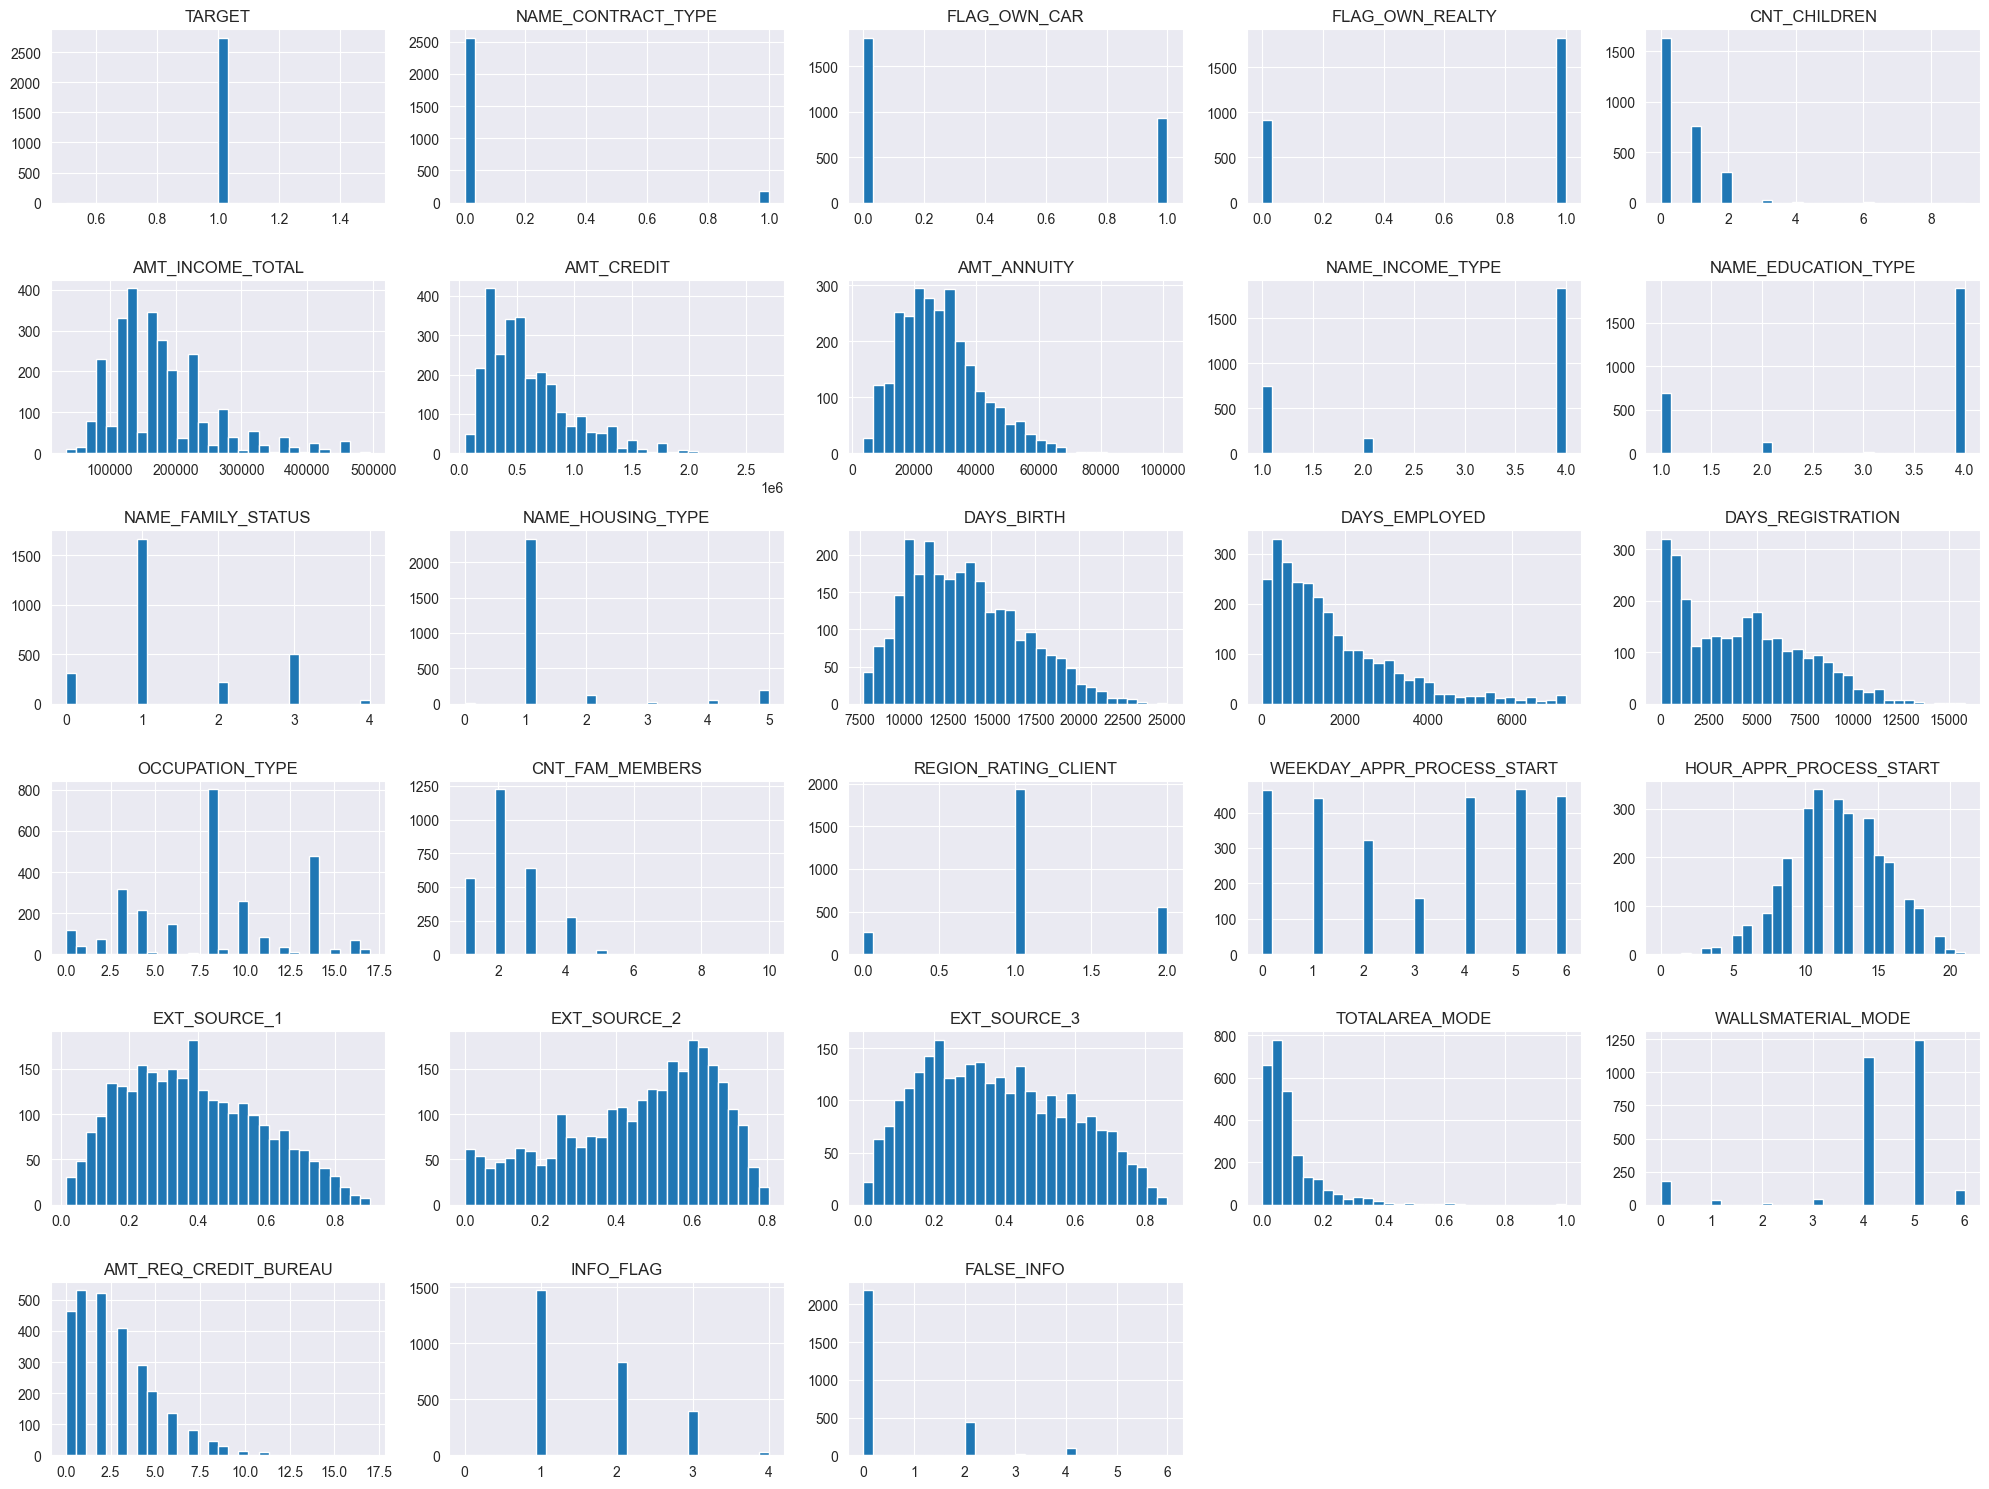

In [211]:
data[data['TARGET'] == 1].hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()

## Sampling

In [212]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Split data into features (X) and target (y)
X = data.drop('TARGET', axis=1)
y = data['TARGET']

# Split data into training and testing sets
X_sample, X_test, y_sample, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

smote = SMOTE()
# Balancing the data
X_train, y_train = smote.fit_resample(X_sample, y_sample)

In [213]:
y_train.value_counts()

TARGET
0    26053
1    26053
Name: count, dtype: int64

In [214]:
y_test.value_counts()

TARGET
0    11145
1      838
Name: count, dtype: int64

## Regresion lineal

In [215]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)
y_pred = pipe.predict(X_test)


Accuracy: 0.7689226404072436
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.79      0.86     11145
           1       0.14      0.44      0.21       838

    accuracy                           0.77     11983
   macro avg       0.54      0.62      0.54     11983
weighted avg       0.89      0.77      0.82     11983



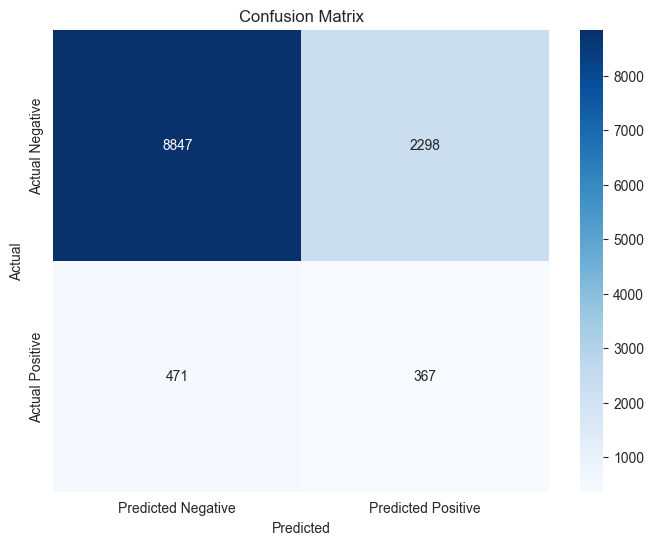

In [216]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(class_report)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

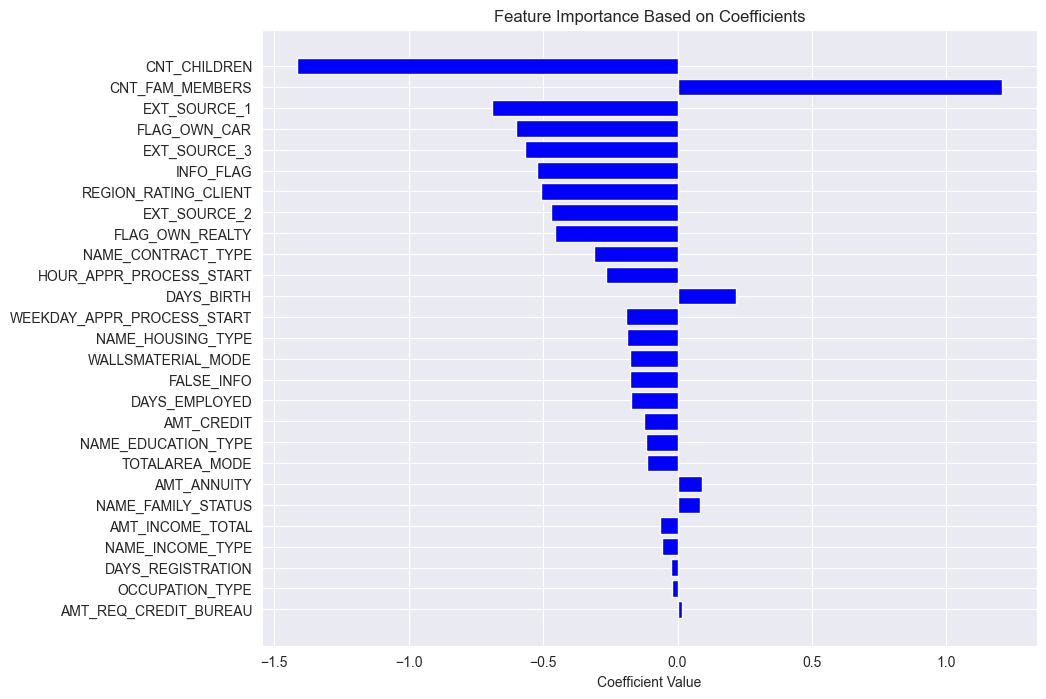

In [217]:
coefficients = pipe.steps[1][1].coef_[0]
features = X.columns

feature_importance = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='b', align='center')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance Based on Coefficients')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest values at the top
plt.show()

## Random Forest

In [222]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest classifier
pipe2 = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100, random_state=73))
pipe2.fit(X_train, y_train)
pipe2.score(X_test, y_test)
y_rf_pred = pipe2.predict(X_test)

Accuracy: 0.9059500959692899
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     11145
           1       0.13      0.06      0.08       838

    accuracy                           0.91     11983
   macro avg       0.53      0.52      0.52     11983
weighted avg       0.88      0.91      0.89     11983



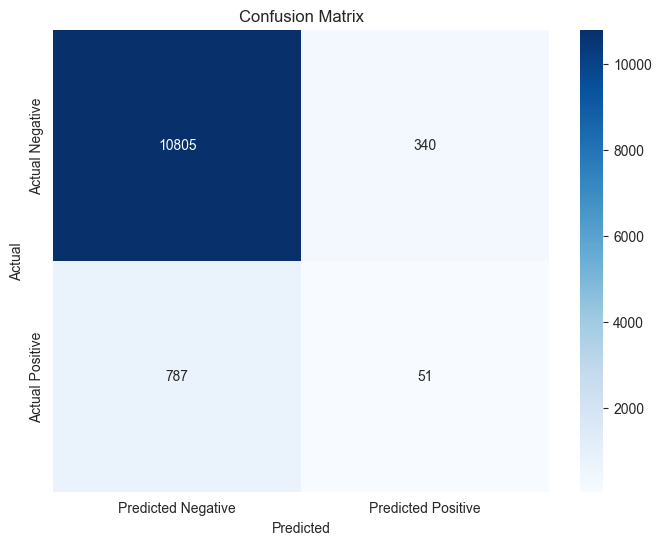

In [223]:
# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_rf_pred)
conf_matrix_rf = confusion_matrix(y_test, y_rf_pred)
class_report_rf = classification_report(y_test, y_rf_pred)

print(f'Accuracy: {accuracy_rf}')
print('Classification Report:')
print(class_report_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

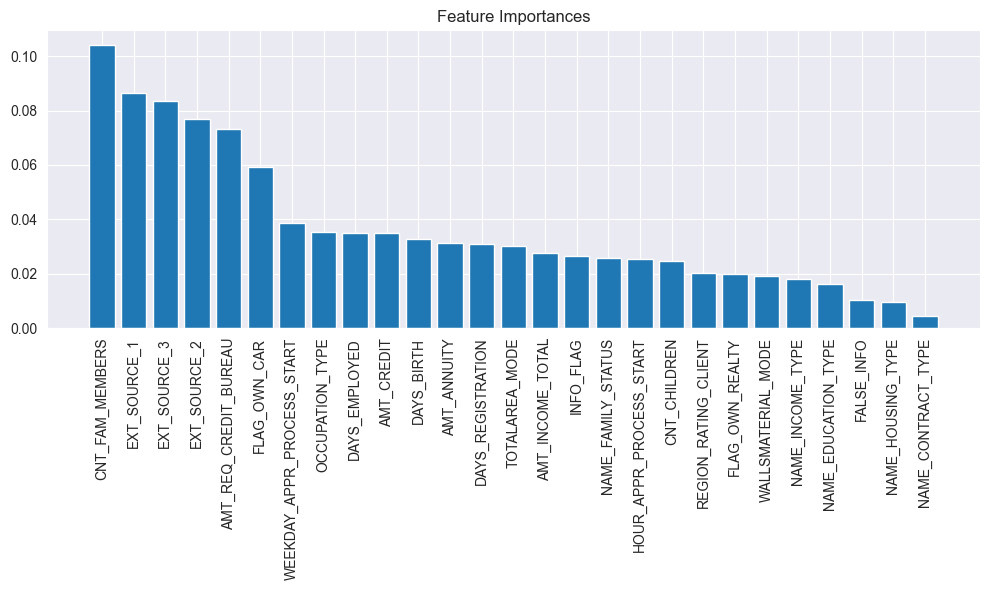

In [224]:
# Get feature importances
importances = pipe2[1].feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()